## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import ttest_ind
from scipy.stats import levene
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
file_path = '/Users/ericjiang/Desktop/msci719_assignment/exam/'
file_name = 'data.xlsx'
df = pd.read_excel(file_path + file_name)

In [3]:
df

,PlayerID,Market Value,Shooting,Heading,Pressing,Substitute player?,Division,Age,Height
0,136814,9555000.00,63,64,47,0,First devision,19,176
1,132170,9240000.00,95,96,76,0,First devision,18,194
2,129316,9100000.00,57,59,40,0,First devision,25,178
3,142412,8393846.56,72,76,59,0,First devision,29,177
4,133559,8645000.00,78,79,59,0,First devision,18,184
...,...,...,...,...,...,...,...,...,...
695,182832,522875.00,8,7,1,1,First devision,24,166
696,190123,534625.00,9,9,3,0,First devision,26,170
697,164523,528750.00,17,19,3,1,First devision,28,175
698,174545,511750.00,8,6,5,0,First devision,20,176


In [4]:
# check missing values
df.isnull().sum()

PlayerID              0
Market Value          0
Shooting              0
Heading               0
Pressing              0
Substitute player?    0
Division              0
Age                   0
Height                0
dtype: int64

## Part A

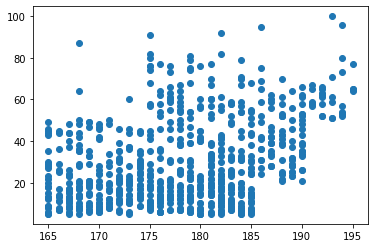

In [5]:
# scatter plot
x = df['Height']
y = df['Heading']
plt.scatter(x,y)
plt.show()

In [6]:
# correlation test
r, p = scipy.stats.pearsonr(x, y)
print('r:'+str(r))
print('p:'+str(p))
# a significant medium effect

r:0.3644843475392581
p:2.0384816518298775e-23


In [7]:
median_height = np.median(df['Height'])
df_tall = df[df['Height']>=median_height]
df_short = df[df['Height']<median_height]

[Text(0, 0, 'Tall'), Text(0, 0, 'Short')]

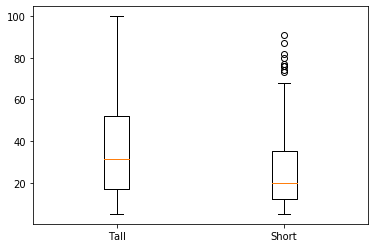

In [8]:
# boxplot (by group)
my_dict = {'Tall': df_tall['Heading'], 'Short': df_short['Heading']}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

In [9]:
# summary statistics
u1,u2=np.mean(df_tall['Heading']),np.mean(df_short['Heading'])
sd1,sd2=np.std(df_tall['Heading']),np.std(df_short['Heading'])
print(u1,u2)
print(sd1,sd2)

34.81142857142857 25.71142857142857
21.16247043948416 17.931763859198036


In [10]:
# levene test
stat, p = levene(df_tall['Heading'],df_short['Heading'])
stat, p
# p<0.05, we reject H0, which means the variances of two samples are not equal

(19.31818408928394, 1.278678658692957e-05)

In [11]:
# t-test
# H0:u1<=u2  H1:u1>u2
# unequal variance
def t_test(x,y,alternative='both-sided'):
            t, double_p = ttest_ind(x,y,equal_var = False)
            if alternative == 'both-sided':
                pval = double_p
            elif alternative == 'greater':
                if np.mean(x) > np.mean(y):
                    pval = double_p/2.
                else:
                    pval = 1.0 - double_p/2.
            elif alternative == 'less':
                if np.mean(x) < np.mean(y):
                    pval = double_p/2.
                else:
                    pval = 1.0 - double_p/2.
            return (t,pval)

t_test(df_tall['Heading'], df_short['Heading'],alternative='greater')
# p<0.001, so we reject H0

(6.128842934670694, 7.498538109360002e-10)

## Part B

In [12]:
df_passing = pd.read_excel(file_path + file_name,'PassAccuracy')

In [13]:
df_passing

,Player,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,...,Week29,Week30,Week31,Week32,Week33,Week34,Week35,Week36,Week37,Week38
0,Rüştü,61,61,63,60,61,63,61,70,70,...,64,64,63,67,72,65,68,65,64,65
1,Henrik,68,60,73,74,72,79,80,81,82,...,73,70,76,76,84,71,67,75,73,77
2,Arian,50,45,46,55,44,40,55,58,60,...,43,40,41,39,52,40,45,48,46,45
3,Sunil,68,73,71,74,76,86,83,79,78,...,73,74,72,75,90,73,71,72,74,80
4,Luís,52,50,48,52,51,51,62,65,65,...,41,49,52,40,60,47,51,50,40,44


In [14]:
df_passing = df_passing.transpose()
df_passing.head()

,0,1,2,3,4
Player,Rüştü,Henrik,Arian,Sunil,Luís
Week1,61,68,50,68,52
Week2,61,60,45,73,50
Week3,63,73,46,71,48
Week4,60,74,55,74,52


In [15]:
new_header = list(df_passing.iloc[0])
df_passing = df_passing[1:]
df_passing.columns = new_header
df_passing = df_passing.reset_index()
df_passing = df_passing.rename(columns={'index': 'Week'})
df_passing.head()

,Week,Rüştü,Henrik,Arian,Sunil,Luís
0,Week1,61,68,50,68,52
1,Week2,61,60,45,73,50
2,Week3,63,73,46,71,48
3,Week4,60,74,55,74,52
4,Week5,61,72,44,76,51


In [16]:
result = []
for i in range(len(df_passing)):
    result.append(df_passing.iloc[i]['Week'][4:])
df_passing['Week'] = result
df_passing.head()

,Week,Rüştü,Henrik,Arian,Sunil,Luís
0,1,61,68,50,68,52
1,2,61,60,45,73,50
2,3,63,73,46,71,48
3,4,60,74,55,74,52
4,5,61,72,44,76,51


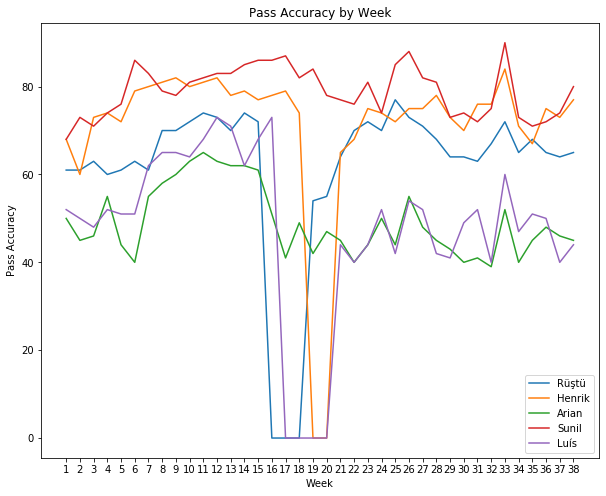

In [17]:
# time series visualization
plt.figure(figsize=(10,8))
plt.plot('Week','Rüştü',data=df_passing,label='Rüştü')
plt.plot('Week','Henrik',data=df_passing,label='Henrik')
plt.plot('Week','Arian',data=df_passing,label='Arian')
plt.plot('Week','Sunil',data=df_passing,label='Sunil')
plt.plot('Week','Luís',data=df_passing,label='Luís')
plt.xlabel('Week')
plt.ylabel('Pass Accuracy')
plt.title('Pass Accuracy by Week')
plt.legend(loc='lower right')
plt.show()

In [18]:
df_passing_2 = df_passing
cols = ['Rüştü','Henrik','Arian','Sunil','Luís']
df_passing_2[cols] = df_passing_2[cols].replace(['0', 0], np.nan)

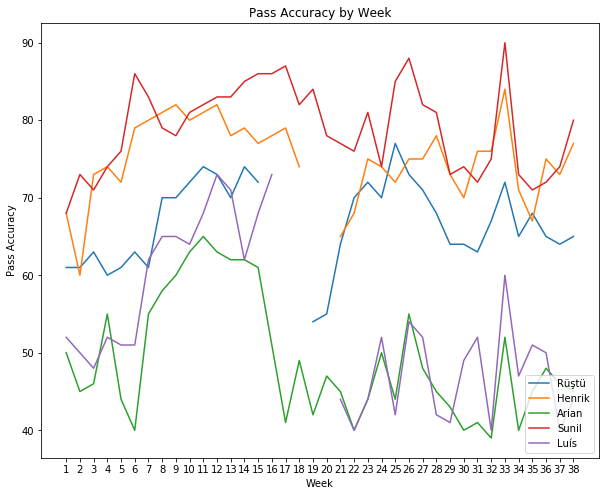

In [19]:
# time series visualization (0 values set to null to change the scale of the plot)
plt.figure(figsize=(10,8))
plt.plot('Week','Rüştü',data=df_passing_2,label='Rüştü')
plt.plot('Week','Henrik',data=df_passing_2,label='Henrik')
plt.plot('Week','Arian',data=df_passing_2,label='Arian')
plt.plot('Week','Sunil',data=df_passing_2,label='Sunil')
plt.plot('Week','Luís',data=df_passing_2,label='Luís')
plt.xlabel('Week')
plt.ylabel('Pass Accuracy')
plt.title('Pass Accuracy by Week')
plt.legend(loc='lower right')
plt.show()

In [20]:
# takes around 6-8 weeks for players to be synchronized with other team members
# after 15-17 weeks, the pass accuracy starts to drop again
# Arian and Luís should be replaced

## Part C

In [21]:
df_young = df[df['Age']<=22]
# drop PlayerID and Market Value to focus on the performance of players and their natural characteristics
df_young = df_young.drop(['PlayerID','Market Value'],axis=1)
df_young.head()

,Shooting,Heading,Pressing,Substitute player?,Division,Age,Height
0,63,64,47,0,First devision,19,176
1,95,96,76,0,First devision,18,194
4,78,79,59,0,First devision,18,184
7,60,59,40,0,First devision,17,183
8,27,26,7,0,First devision,22,175


In [22]:
df_young['Division'].unique()

array(['First devision', 'Second Devision'], dtype=object)

In [23]:
df_young['Division'] = df_young.Division.replace({'First devision':0, 'Second Devision':1})
df_young.head()

,Shooting,Heading,Pressing,Substitute player?,Division,Age,Height
0,63,64,47,0,0,19,176
1,95,96,76,0,0,18,194
4,78,79,59,0,0,18,184
7,60,59,40,0,0,17,183
8,27,26,7,0,0,22,175


In [24]:
# normalize the data for k-means clustering
min_max_scaler = preprocessing.MinMaxScaler()
df_young_clustering = pd.DataFrame(min_max_scaler.fit_transform(df_young))
df_young_clustering

,0,1,2,3,4,5,6
0,0.652174,0.648352,0.618421,0.0,0.0,0.4,0.366667
1,1.000000,1.000000,1.000000,0.0,0.0,0.2,0.966667
2,0.815217,0.813187,0.776316,0.0,0.0,0.2,0.633333
3,0.619565,0.593407,0.526316,0.0,0.0,0.0,0.600000
4,0.260870,0.230769,0.092105,0.0,0.0,1.0,0.333333
...,...,...,...,...,...,...,...
329,0.130435,0.109890,0.000000,0.0,0.0,0.4,0.600000
330,0.315217,0.329670,0.263158,0.0,0.0,0.0,0.300000
331,0.141304,0.087912,0.052632,0.0,0.0,0.8,0.066667
332,0.184783,0.197802,0.105263,0.0,0.0,0.2,0.000000


In [25]:
# implement k-means clustering with k=3
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_young_clustering)

KMeans(init='random', n_clusters=3, random_state=0)

In [26]:
df_young_clustering['label'] = kmeans.labels_

In [27]:
df_young_clustering.head(20)

,0,1,2,3,4,5,6,label
0,0.652174,0.648352,0.618421,0.0,0.0,0.4,0.366667,1
1,1.000000,1.000000,1.000000,0.0,0.0,0.2,0.966667,1
2,0.815217,0.813187,0.776316,0.0,0.0,0.2,0.633333,1
3,0.619565,0.593407,0.526316,0.0,0.0,0.0,0.600000,1
4,0.260870,0.230769,0.092105,0.0,0.0,1.0,0.333333,1
5,0.641304,0.659341,0.618421,0.0,0.0,0.8,0.900000,1
6,0.695652,0.681319,0.644737,0.0,0.0,0.4,0.433333,1
7,0.467391,0.472527,0.421053,1.0,0.0,0.2,0.166667,2
8,0.619565,0.593407,0.486842,1.0,0.0,0.2,0.400000,2
9,0.565217,0.549451,0.526316,0.0,0.0,0.0,0.666667,1


In [28]:
df_young_clustering['label'].value_counts()

1    154
2     96
0     84
Name: label, dtype: int64

In [29]:
# define a function to calculate salary based on the number of assigned players to each staff
def calculate_salary(x):
    if x>=0 and x<=50:
        return 1200*x
    elif x>=51 and x<=150:
        return 1000*x
    elif x>=151 and x<=250:
        return 900*x
    elif x>=251:
        return 870*x

In [30]:
print('The salary for the staff who monitors cluster 0 is'+' $'+str(calculate_salary(84)))
print('The salary for the staff who monitors cluster 1 is'+' $'+str(calculate_salary(154)))
print('The salary for the staff who monitors cluster 2 is'+' $'+str(calculate_salary(96)))

The salary for the staff who monitors cluster 0 is $84000
The salary for the staff who monitors cluster 1 is $138600
The salary for the staff who monitors cluster 2 is $96000


## Part D

In [31]:
df_pred = df.copy()
df_pred['Division'] = df_pred.Division.replace({'First devision':0, 'Second Devision':1})
df_pred.head()

,PlayerID,Market Value,Shooting,Heading,Pressing,Substitute player?,Division,Age,Height
0,136814,9555000.00,63,64,47,0,0,19,176
1,132170,9240000.00,95,96,76,0,0,18,194
2,129316,9100000.00,57,59,40,0,0,25,178
3,142412,8393846.56,72,76,59,0,0,29,177
4,133559,8645000.00,78,79,59,0,0,18,184


In [32]:
X = df_pred.drop(['PlayerID','Market Value'],axis=1)
y = df_pred['Market Value']

In [33]:
# correlation matrix
X.corr()
# Shooting, Heading and Pressing skills are highly correlated, so only one of them should be kept in the linear regression model

,Shooting,Heading,Pressing,Substitute player?,Division,Age,Height
Shooting,1.000000,0.995815,0.969455,-0.201486,-0.195344,0.004268,0.361099
Heading,0.995815,1.000000,0.975290,-0.198541,-0.196091,0.005846,0.364484
Pressing,0.969455,0.975290,1.000000,-0.207341,-0.166752,0.011217,0.355895
Substitute player?,-0.201486,-0.198541,-0.207341,1.000000,-0.102311,-0.052187,-0.132185
Division,-0.195344,-0.196091,-0.166752,-0.102311,1.000000,-0.045574,-0.071093
Age,0.004268,0.005846,0.011217,-0.052187,-0.045574,1.000000,-0.029251
Height,0.361099,0.364484,0.355895,-0.132185,-0.071093,-0.029251,1.000000


In [34]:
# linear regression
X2 = sm.add_constant(X)
est = sm.OLS(y, X2).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:           Market Value   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     93.84
Date:                Sat, 17 Apr 2021   Prob (F-statistic):           5.78e-96
Time:                        21:55:46   Log-Likelihood:                -10893.
No. Observations:                 700   AIC:                         2.180e+04
Df Residuals:                     692   BIC:                         2.184e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.796e+06   1.39

/Library/Anaconda/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [35]:
# drop insignificant features and iterate
X = X.drop(['Shooting','Pressing','Age','Height'],axis=1)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:           Market Value   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     218.5
Date:                Sat, 17 Apr 2021   Prob (F-statistic):          7.21e-100
Time:                        21:55:46   Log-Likelihood:                -10894.
No. Observations:                 700   AIC:                         2.180e+04
Df Residuals:                     696   BIC:                         2.181e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               7.987e+05   1.22

In [36]:
# predict the new market value
df_pred['New Market Value'] = 7.987e+05 + 5.37e+04*df_pred['Heading'] + 5.332e+05*df_pred['Substitute player?']\
                             -1.448e+06*df_pred['Division']

In [37]:
df_pred

,PlayerID,Market Value,Shooting,Heading,Pressing,Substitute player?,Division,Age,Height,New Market Value
0,136814,9555000.00,63,64,47,0,0,19,176,4235500.0
1,132170,9240000.00,95,96,76,0,0,18,194,5953900.0
2,129316,9100000.00,57,59,40,0,0,25,178,3967000.0
3,142412,8393846.56,72,76,59,0,0,29,177,4879900.0
4,133559,8645000.00,78,79,59,0,0,18,184,5041000.0
...,...,...,...,...,...,...,...,...,...,...
695,182832,522875.00,8,7,1,1,0,24,166,1707800.0
696,190123,534625.00,9,9,3,0,0,26,170,1282000.0
697,164523,528750.00,17,19,3,1,0,28,175,2352200.0
698,174545,511750.00,8,6,5,0,0,20,176,1120900.0


In [38]:
# extract those players who are underrated
df_underrated = df_pred[df_pred['Market Value']<df_pred['New Market Value']].reset_index().drop('index',axis=1)
df_underrated['Underrated Ratio'] = abs(df_underrated['Market Value']-df_underrated['New Market Value'])\
                                    /df_underrated['Market Value']
df_underrated

,PlayerID,Market Value,Shooting,Heading,Pressing,Substitute player?,Division,Age,Height,New Market Value,Underrated Ratio
0,145230,5390000.0,87,87,72,0,0,19,168,5470600.0,0.014954
1,136184,5068800.0,83,82,63,1,0,20,182,5735300.0,0.131491
2,131857,5040000.0,79,80,63,0,0,29,175,5094700.0,0.010853
3,143728,4672500.0,72,76,59,0,0,20,180,4879900.0,0.044387
4,124547,4290000.3,88,91,76,0,0,27,175,5685400.0,0.325268
...,...,...,...,...,...,...,...,...,...,...,...
355,182832,522875.0,8,7,1,1,0,24,166,1707800.0,2.266173
356,190123,534625.0,9,9,3,0,0,26,170,1282000.0,1.397942
357,164523,528750.0,17,19,3,1,0,28,175,2352200.0,3.448605
358,174545,511750.0,8,6,5,0,0,20,176,1120900.0,1.190327


In [39]:
# categorize players based on current market value
result = []
for i in range(len(df_underrated)):
    if df_underrated.iloc[i]['Market Value']>=5000000:
        result.append(1)
    elif df_underrated.iloc[i]['Market Value']>=2000000 and df_underrated.iloc[i]['Market Value']<5000000:
        result.append(2)
    elif df_underrated.iloc[i]['Market Value']<2000000:
        result.append(3)
df_underrated['Market Category'] = result

In [40]:
df_underrated

,PlayerID,Market Value,Shooting,Heading,Pressing,Substitute player?,Division,Age,Height,New Market Value,Underrated Ratio,Market Category
0,145230,5390000.0,87,87,72,0,0,19,168,5470600.0,0.014954,1
1,136184,5068800.0,83,82,63,1,0,20,182,5735300.0,0.131491,1
2,131857,5040000.0,79,80,63,0,0,29,175,5094700.0,0.010853,1
3,143728,4672500.0,72,76,59,0,0,20,180,4879900.0,0.044387,2
4,124547,4290000.3,88,91,76,0,0,27,175,5685400.0,0.325268,2
...,...,...,...,...,...,...,...,...,...,...,...,...
355,182832,522875.0,8,7,1,1,0,24,166,1707800.0,2.266173,3
356,190123,534625.0,9,9,3,0,0,26,170,1282000.0,1.397942,3
357,164523,528750.0,17,19,3,1,0,28,175,2352200.0,3.448605,3
358,174545,511750.0,8,6,5,0,0,20,176,1120900.0,1.190327,3


In [41]:
# sort the table, and rearrange it to a clean dataset which can be used for optimization in Excel directly
df_order = df_underrated.sort_values(by=['Market Category','Underrated Ratio'],ascending=False)
df_1 = df_order[df_order['Market Category']==1].head(2)
df_2 = df_order[df_order['Market Category']==2].head(8)
df_3 = df_order[df_order['Market Category']==3].head(20)
df_list = df_1.append(df_2,ignore_index=True)
df_list = df_list.append(df_3,ignore_index=True)

In [42]:
df_list

,PlayerID,Market Value,Shooting,Heading,Pressing,Substitute player?,Division,Age,Height,New Market Value,Underrated Ratio,Market Category
0,136184,5068800.00,83,82,63,1,0,20,182,5735300.0,0.131491,1
1,145230,5390000.00,87,87,72,0,0,19,168,5470600.0,0.014954,1
2,131223,2373333.63,65,64,42,0,0,29,195,4235500.0,0.784621,2
3,127451,2730000.00,75,75,57,0,0,25,179,4826200.0,0.767839,2
4,134992,2447500.00,64,63,41,0,0,25,192,4181800.0,0.708601,2
5,129407,2640000.00,66,66,45,0,0,21,177,4342900.0,0.645038,2
6,145384,2314000.00,56,55,36,0,0,28,177,3752200.0,0.621521,2
7,133870,2250000.00,43,43,28,1,0,28,179,3641000.0,0.618222,2
8,144107,2250000.00,53,52,30,0,0,20,186,3591100.0,0.596044,2
9,130495,2340000.00,54,53,37,0,0,21,190,3644800.0,0.557607,2


In [43]:
df_list.to_csv('list.csv')

**The rest of the analysis (optimization models) is implemented in Excel. Thank you.**